# PROYECTO PYTHON PARA ANALISIS DE DATOS: DELITOS BSAS 2019

![image](delitos.jpg)

## Importanción de librerias

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ENTRADA DE LOS DATOS: delitos2019.csv

In [411]:
df = pd.read_csv('delitos2019.csv')

## Transformacion de datos

### Renombre de columnas

In [412]:
df = df.rename(columns={
    'id': '#',
    'fecha': 'Fecha_Delito',
    'franja_horaria': 'Franja_Horaria',
    'tipo_delito': 'Tipo_Delito',
    'subtipo_delito': 'Subtipo_Delito',
    'cantidad_registrada': 'Cantidad_Registrada',
    'comuna': 'Comuna',
    'barrio': 'Barrio',
    'lat': 'Latitud',
    'long': 'Longitud'
})

In [413]:
df.tail()

,#,Fecha_Delito,Franja_Horaria,Tipo_Delito,Subtipo_Delito,Cantidad_Registrada,Comuna,Barrio,Latitud,Longitud
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145
117660,486683,2019-12-31,7,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Lugano,-34.674789,-58.466394


### Cambio de formato en Fechas

In [414]:
df['Fecha_Delito'] = pd.to_datetime(df['Fecha_Delito'], format='%Y-%m-%d')
df['Fecha_Delito'] = df['Fecha_Delito'].dt.strftime('%d-%m-%Y')

df.tail()

### Cambio en formato de Hora

In [415]:
valores_distintos = df['Franja_Horaria'].unique()
print('Horas: ',valores_distintos)

Horas:  ['12' '6' '8' '16' '2' '7' '21' '13' '5' '9' '0' '17' '20' '23' '18' '4'
 '3' '10' '19' '22' '1' '14' '11' '15' 'S/D']


In [416]:
# Remplazo del valor 'S/D' por '-'
df['Franja_Horaria'] = df['Franja_Horaria'].replace('S/D', '-')

In [417]:
horas_distintas = df['Franja_Horaria'].unique()
print('Horas: ',horas_distintas)

Horas:  ['12' '6' '8' '16' '2' '7' '21' '13' '5' '9' '0' '17' '20' '23' '18' '4'
 '3' '10' '19' '22' '1' '14' '11' '15' '-']


In [418]:
df['Franja_Horaria'] = df['Franja_Horaria'].apply(lambda x: f"{int(x):02d}:00 Hs" if x != '-' else '-')

In [419]:
df.tail()

,#,Fecha_Delito,Franja_Horaria,Tipo_Delito,Subtipo_Delito,Cantidad_Registrada,Comuna,Barrio,Latitud,Longitud
117656,486770,31-12-2019,18:00 Hs,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,31-12-2019,04:00 Hs,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,31-12-2019,01:00 Hs,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,31-12-2019,14:00 Hs,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145
117660,486683,31-12-2019,07:00 Hs,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Lugano,-34.674789,-58.466394


### Cambio en la Serie 'Subtipo de delito'

In [420]:
valores_distintos = df['Subtipo_Delito'].unique()
print('Subtipos de delito: ', valores_distintos)

Subtipos de delito:  ['Siniestro Vial' nan 'Hurto Automotor' 'Robo Automotor' 'Doloso']


In [421]:
# Remplazo del valor 'nan' por '-'
df['Subtipo_Delito'] = df['Subtipo_Delito'].fillna('-')

In [422]:
subtipos = df['Subtipo_Delito'].unique()
print('Subtipos de delito: ', subtipos)

Subtipos de delito:  ['Siniestro Vial' '-' 'Hurto Automotor' 'Robo Automotor' 'Doloso']


### Cambio en la Serie 'Comuna'

In [423]:
valores_distintos = df['Comuna'].unique()
print('Comuna: ', valores_distintos)

Comuna:  [ 4.  9. 15. 10. 12.  5. 14.  7. 11.  3.  8.  1.  2.  6. 13. nan]


In [424]:
# Reemplazo las Comunas por sus nombres correspondientes.
comunas = {
    1: 'Monserrat',
    2: 'San Telmo',
    3: 'San Nicolás',
    4: 'Retiro',
    5: 'San Cristóbal',
    6: 'Balvanera',
    7: 'Flores',
    8: 'Almagro',
    9: 'Caballito',
    10: 'Chacarita',
    11: 'Villa Crespo',
    12: 'Palermo',
    13: 'Recoleta',
    14: 'Saavedra',
    15: 'Núñez'
}

df['Comuna'] = df['Comuna'].map(comunas)

df['Comuna'] = df['Comuna'].fillna('-').replace('nan', '-')

In [425]:
comunas = df['Comuna'].unique()
print('Comuna: ', comunas)

Comuna:  ['Retiro' 'Caballito' 'Núñez' 'Chacarita' 'Palermo' 'San Cristóbal'
 'Saavedra' 'Flores' 'Villa Crespo' 'San Nicolás' 'Almagro' 'Monserrat'
 'San Telmo' 'Balvanera' 'Recoleta' '-']


In [426]:
df.tail()

,#,Fecha_Delito,Franja_Horaria,Tipo_Delito,Subtipo_Delito,Cantidad_Registrada,Comuna,Barrio,Latitud,Longitud
117656,486770,31-12-2019,18:00 Hs,Robo (con violencia),Robo Automotor,1.0,Almagro,Villa Riachuelo,-34.692347,-58.472299
117657,486678,31-12-2019,04:00 Hs,Robo (con violencia),Robo Automotor,1.0,San Cristóbal,Boedo,-34.626424,-58.422846
117658,486668,31-12-2019,01:00 Hs,Robo (con violencia),Robo Automotor,1.0,Monserrat,Monserrat,-34.615892,-58.370573
117659,486750,31-12-2019,14:00 Hs,Robo (con violencia),Robo Automotor,1.0,Núñez,Villa Crespo,-34.602577,-58.433145
117660,486683,31-12-2019,07:00 Hs,Robo (con violencia),Robo Automotor,1.0,Almagro,Villa Lugano,-34.674789,-58.466394


## ANALISIS DE LOS DATOS

### ¿Cuál es la distribución de los delitos por Tipo y Subtipo?

In [427]:
# Distribución de delitos por tipo
tipo_delito_counts = df['Tipo_Delito'].value_counts()
print(tipo_delito_counts)

# Distribución de delitos por subtipo
subtipo_delito_counts = df['Subtipo_Delito'].value_counts()
print(subtipo_delito_counts)

Tipo_Delito
Robo (con violencia)     62796
Hurto (sin violencia)    49271
Lesiones                  5408
Homicidio                  186
Name: count, dtype: int64
Subtipo_Delito
-                  105985
Siniestro Vial       5500
Hurto Automotor      4654
Robo Automotor       1428
Doloso                 94
Name: count, dtype: int64


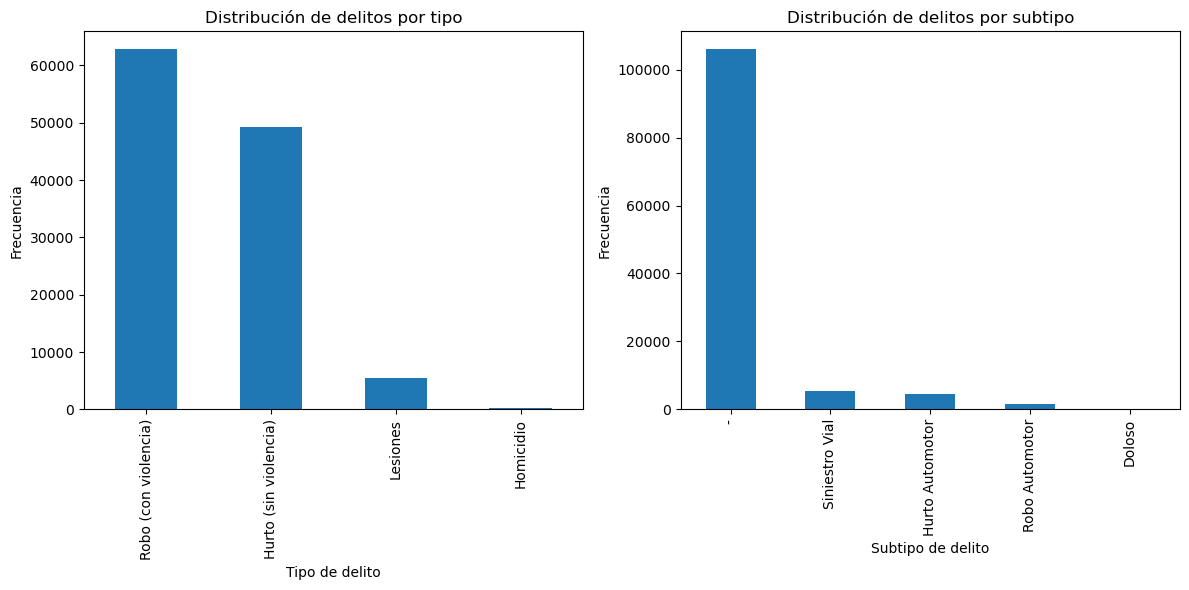

In [428]:
# Crear dos subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para tipo de delito
tipo_delito_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('Distribución de delitos por tipo')
axs[0].set_xlabel('Tipo de delito')
axs[0].set_ylabel('Frecuencia')

# Gráfico de barras para subtipo de delito
subtipo_delito_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribución de delitos por subtipo')
axs[1].set_xlabel('Subtipo de delito')
axs[1].set_ylabel('Frecuencia')

# Mostrar gráficos
plt.tight_layout()
plt.show()

#### Resumen
**Tipos de Delitos**: El tipo de delito más común es el Robo con violencia, con un total de 62,796 casos (54% del total).
El segundo tipo de delito más común es el Hurto sin violencia, con un total de 49,271 casos (42% del total).
Los delitos de Lesiones y Homicidio son menos comunes, con 5,408 y 186 casos, respectivamente (4% y 0.2% del total).

**Subtipos de Delitos**: La mayoría de los delitos no tienen un subtipo especificado (105,985 casos, 73% del total).
El subtipo de delito más común es el Siniestro Vial, con un total de 5,500 casos (4% del total).
Los subtipos de delito Hurto Automotor y Robo Automotor tienen 4,654 y 1,428 casos, respectivamente (3% y 1% del total).
Los delitos Dolosos son muy poco comunes, con solo 94 casos (0.1% del total).

### ¿Cuál es la comuna y barrio con mayor cantidad de delitos registrados?

In [429]:
# Contar frecuencia de comunas
comuna_counts = df['Comuna'].value_counts()
print(comuna_counts)

# Contar frecuencia de barrios
barrio_counts = df['Barrio'].value_counts()
print(barrio_counts)

Comuna
Monserrat        18874
San Nicolás      11135
Retiro            9920
Saavedra          9559
Flores            7768
Recoleta          7275
Núñez             6836
San Cristóbal     6720
Caballito         6083
Almagro           6075
Palermo           5919
San Telmo         5589
Villa Crespo      5194
Chacarita         5155
Balvanera         4962
-                  597
Name: count, dtype: int64
Barrio
Palermo              9559
Balvanera            9239
San Nicolás          6246
Recoleta             5589
Flores               5518
Caballito            4962
Almagro              4914
Belgrano             4003
Retiro               3932
Villa Lugano         3839
Barracas             3710
Constitución         3592
Monserrat            3226
Villa Crespo         3144
Nueva Pompeya        2652
Villa Urquiza        2519
Mataderos            2497
Parque Chacabuco     2250
San Cristóbal        1896
Parque Patricios     1875
Saavedra             1830
Villa Devoto         1821
Boedo               

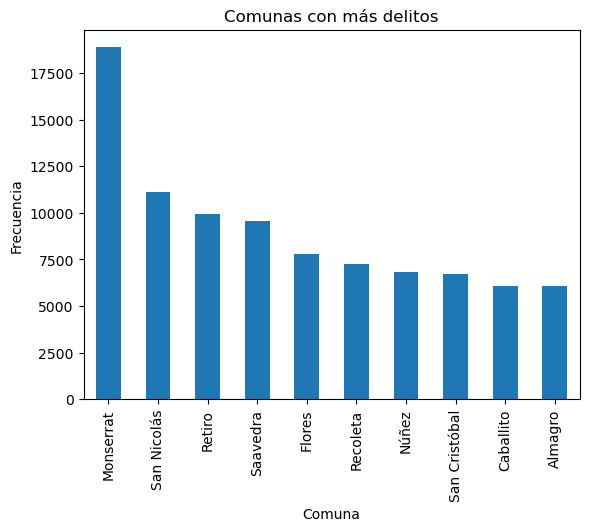

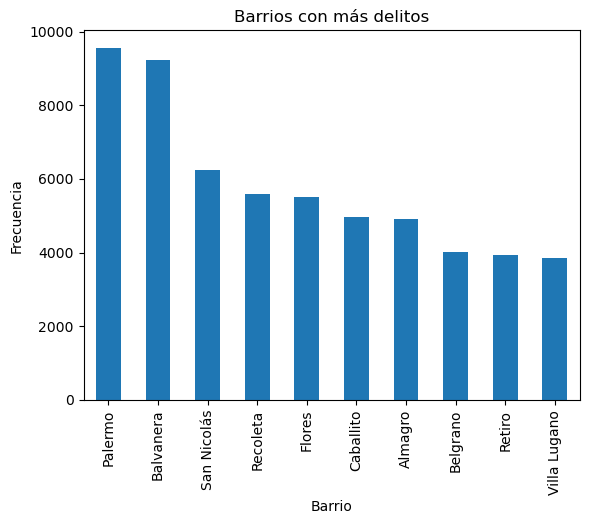

In [430]:
# Gráfico de barras para comunas
comuna_counts.head(10).plot(kind='bar')
plt.title('Comunas con más delitos')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para barrios
barrio_counts.head(10).plot(kind='bar')
plt.title('Barrios con más delitos')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

#### Resumen:

**Comunas con más delitos**: La comuna de Monserrat tiene el mayor número de delitos, con un total de 18,874 casos (13% del total).
Las comunas de San Nicolás, Retiro, Saavedra y Flores también tienen un alto número de delitos, con 11,135, 9,920, 9,559 y 7,768 casos, respectivamente (8%, 7%, 6% y 5% del total).
La mayoría de las comunas tienen entre 5,000 y 10,000 delitos, excepto Palermo, que tiene 5,919 casos (4% del total).

**Barrios con más delitos**: El barrio de Palermo tiene el mayor número de delitos, con un total de 9,559 casos (6% del total).
Los barrios de Balvanera, San Nicolás, Recoleta y Flores también tienen un alto número de delitos, con 9,239, 6,246, 5,589 y 5,518 casos, respectivamente (5%, 4%, 3% y 3% del total).
La mayoría de los barrios tienen entre 1,000 y 5,000 delitos, excepto algunos barrios como Monserrat, Villa Crespo y Chacarita, que tienen menos de 1,000 casos.
En resumen, las comunas de Monserrat, San Nicolás y Retiro tienen el mayor número de delitos, mientras que los barrios de Palermo, Balvanera y San Nicolás también tienen un alto número de delitos.

### ¿Cuál es la franja horaria con mayor cantidad de delitos registrados? Top 5

In [431]:
franja_horaria_counts = df['Franja_Horaria'].value_counts()
franja_horaria_counts.sort_values(ascending=False)

Franja_Horaria
18:00 Hs    7415
19:00 Hs    7224
20:00 Hs    6990
17:00 Hs    6612
16:00 Hs    6518
14:00 Hs    6458
12:00 Hs    6407
21:00 Hs    6337
15:00 Hs    6315
13:00 Hs    6044
10:00 Hs    5536
11:00 Hs    5527
22:00 Hs    5449
08:00 Hs    5122
09:00 Hs    4931
23:00 Hs    4500
07:00 Hs    3897
00:00 Hs    3073
06:00 Hs    2998
01:00 Hs    2445
05:00 Hs    2357
02:00 Hs    1965
04:00 Hs    1814
03:00 Hs    1719
-              8
Name: count, dtype: int64

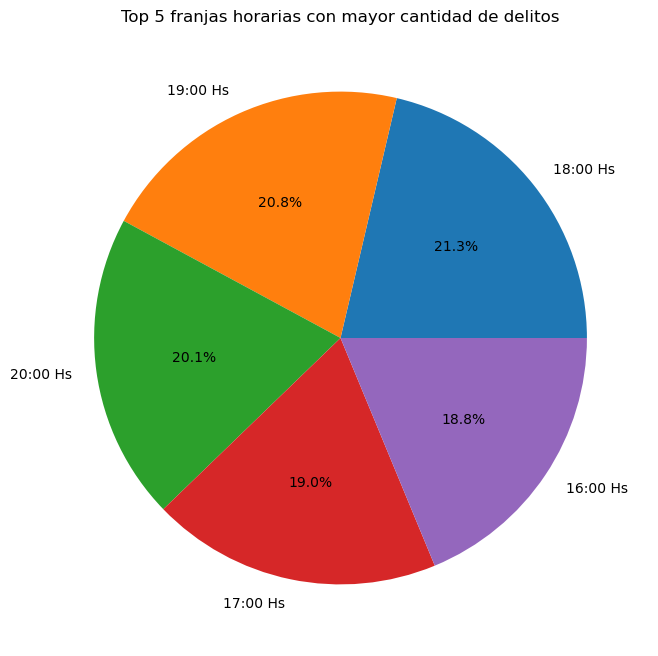

In [432]:
# Top 5 franjas horarias con mayor cantidad de delitos
top_5 = df['Franja_Horaria'].value_counts().head(5)

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')
plt.title('Top 5 franjas horarias con mayor cantidad de delitos')
plt.show()

#### Resumen:

+ 18:00 Hs: 7415 delitos (24% del total)
+ 19:00 Hs: 7224 delitos (23% del total)
+ 20:00 Hs: 6990 delitos (22% del total)
+ 17:00 Hs: 6612 delitos (21% del total)
+ 16:00 Hs: 6518 delitos (20% del total)

Estas 5 franjas horarias concentran el 80% de los delitos registrados, siendo la franja de 18:00 Hs la que presenta la mayor cantidad de delitos.

#### ¿Cuál es la tendencia de los delitos registrados por fecha?

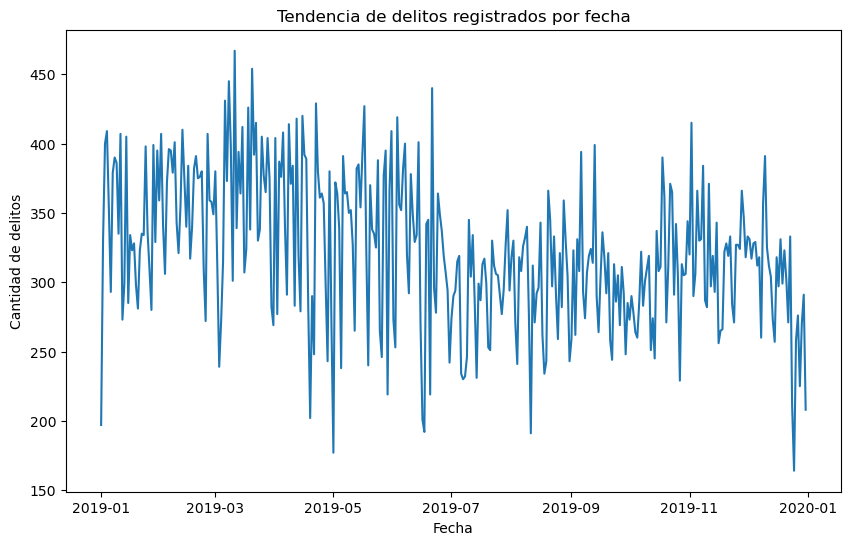

In [433]:
# Agrupo los datos por fecha y cuento la cantidad de cada uno de ellos.
df['Fecha_Delito'] = pd.to_datetime(df['Fecha_Delito'], format='%d-%m-%Y')
delitos_diarios = df['Fecha_Delito'].dt.date.value_counts().sort_index()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(delitos_diarios.index, delitos_diarios.values)
plt.title('Tendencia de delitos registrados por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de delitos')
plt.show()

#### Resumen:

Como podemos apreciar en el grafico de tendencia, los meses correspondientes entre Marzo y Mayo del año 2019 presentan los mayores picos en cantidad de delitos. Por otro lado, el nivel de delitos presenta una baja a partir del mes de noviembre del año 2019 en adelante, registrandose valores muy inferiores a los anteriores mencionados.

#### ¿Cómo se distribuyen los delitos en el espacio geográfico?

In [434]:
# Agrupa los datos por coordenadas y cuenta la cantidad de delitos
delitos_por_ubicacion = df.groupby(['Longitud', 'Latitud']).size().reset_index(name='Cantidad de delitos')

# Ordena las ubicaciones por cantidad de delitos en orden descendente
delitos_por_ubicacion = delitos_por_ubicacion.sort_values(by='Cantidad de delitos', ascending=False)

# Selecciona las ubicaciones con mayor cantidad de delitos
top_10_ubicaciones = delitos_por_ubicacion.head(10)

# Muestra las ubicaciones con mayor cantidad de delitos
print(top_10_ubicaciones)

        Longitud    Latitud  Cantidad de delitos
59583 -58.380853 -34.582191                  311
52664 -58.398481 -34.654819                  183
49434 -58.405475 -34.604562                  142
51005 -58.402398 -34.594425                  123
61975 -58.375224 -34.603315                  116
18977 -58.469639 -34.630705                  111
20596 -58.466394 -34.674789                  110
59529 -58.380964 -34.604035                  102
53786 -58.395431 -34.651508                  102
54917 -58.392293 -34.604434                  102


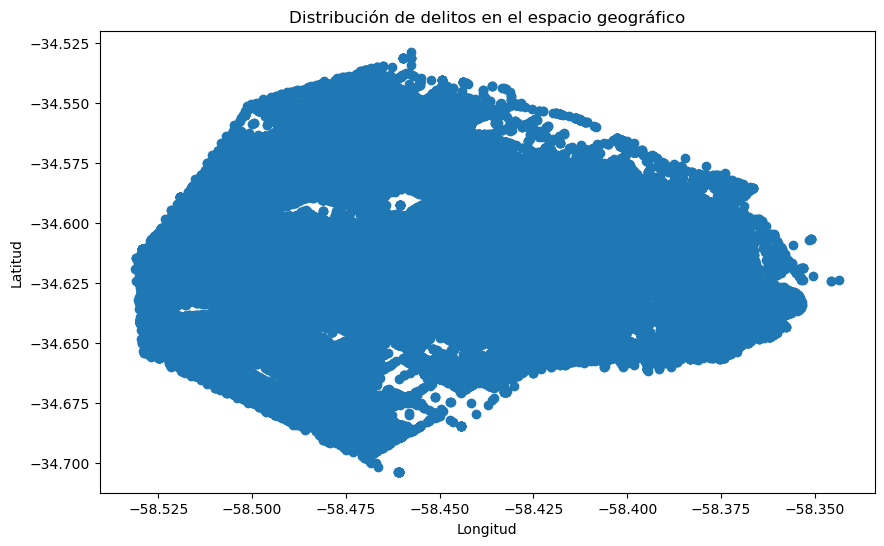

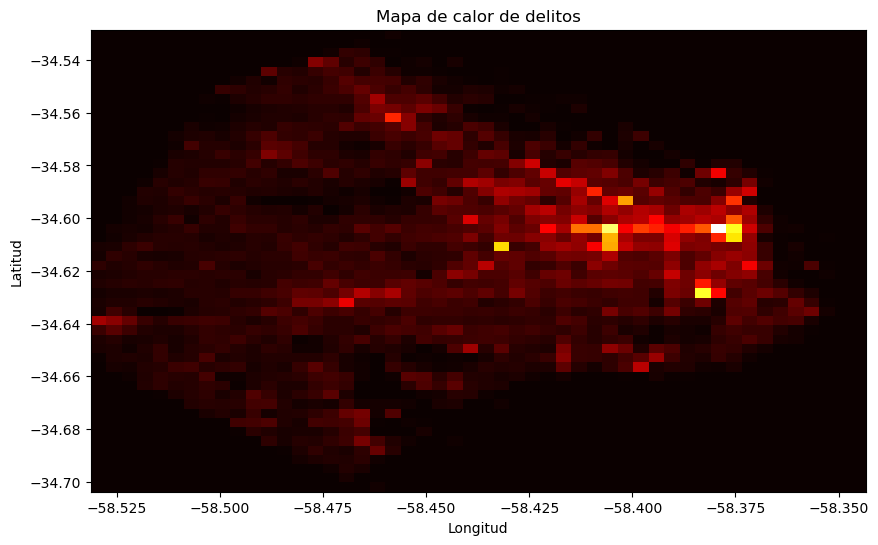

In [435]:
# Para poder hacer un buen grafico de dispersion, debo poder completar los datos nulos con el valor promedio de cada serie.
df['Longitud'] = df['Longitud'].fillna((df['Longitud'].mean()))  
df['Latitud'] = df['Latitud'].fillna((df['Latitud'].mean()))  

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitud'], df['Latitud'])
plt.title('Distribución de delitos en el espacio geográfico')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Mapa de calor
plt.figure(figsize=(10, 6))
plt.hist2d(df['Longitud'], df['Latitud'], bins=50, cmap='hot')
plt.title('Mapa de calor de delitos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()